<a href="https://colab.research.google.com/github/danielbuernor/netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import numpy as np

netflix = pd.read_csv('/content/netflix_data.csv')
print(netflix)


     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [ ]:
print(netflix.head())
print(netflix.info())


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [ ]:
# checking for missing values
print(netflix.isnull().sum())

# handling missing values
netflix.dropna(inplace=True)
print(netflix.info())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4812 entries, 1 to 7783
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 451.1+ KB
None


In [ ]:
#Finding Duplicates
duplicates = netflix.duplicated()

# Displaying duplicate rows
duplicate_rows = netflix[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Counting the number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, duration, description, genre]
Index: []
Number of duplicate rows: 0


In [ ]:
#dropping unwanted columns
unwanted_columns = duplu['cast', 'description']
netflix = netflix.drop(unwanted_columns)
print(netflix.head)

KeyError: ('cast', 'description')

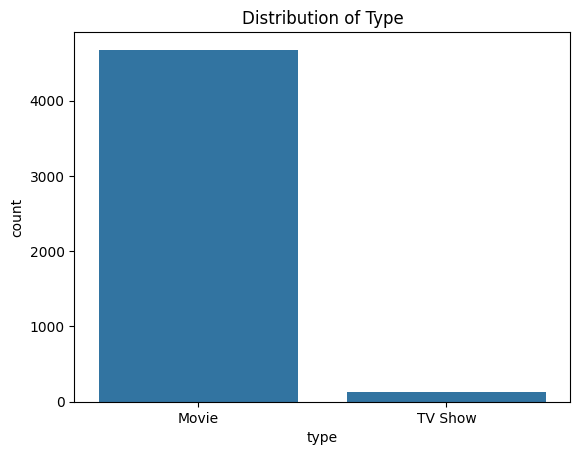

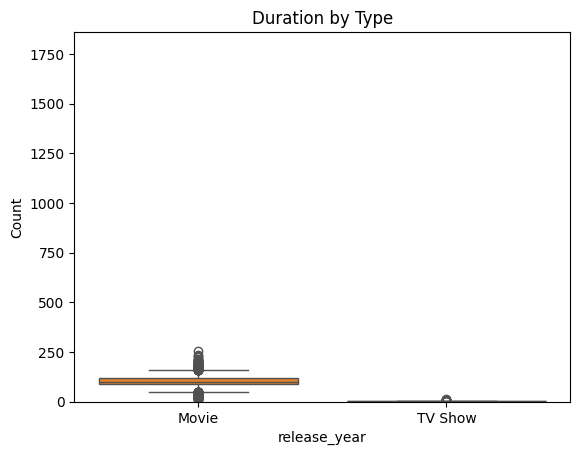

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#find the distribution of type
sns.countplot(x='type', data=netflix)
plt.title('Distribution of Type')
plt.show()

#finding the distribution release year
sns.histplot(x='release_year', data =netflix, bins=20)

sns.boxplot(x='type', y='duration', data=netflix)
plt.title('Duration by Type')
plt.show()


United States     1886
India              864
United Kingdom     311
Canada             155
France             133
Spain              112
Egypt               91
Turkey              81
Japan               81
Philippines         74
Name: country, dtype: int64


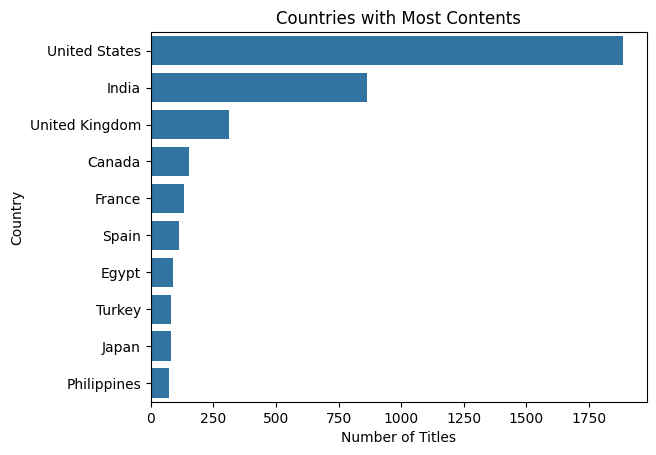

In [ ]:
# Top 10 countries with the most content
top_countries = netflix['country'].value_counts().head(10)
print(top_countries)
sns.barplot(x=top_countries.values, y=top_countries.index, orient='h')
plt.title('Countries with Most Contents')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
netflix['month_added'] = pd.to_datetime(netflix['date_added']).dt.month
print(netflix.head())

  show_id     type  title           director  \
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   
5       July 1, 2017          2016         1

<ipython-input-32-d121d0cc9bf0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = netflix.corr()


              release_year  duration  month_added
release_year      1.000000 -0.220071    -0.035352
duration         -0.220071  1.000000     0.001936
month_added      -0.035352  0.001936     1.000000


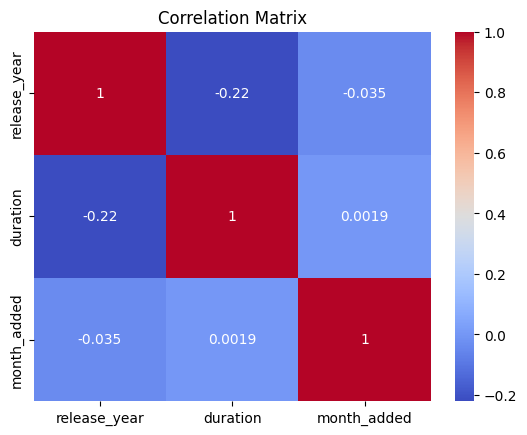

In [ ]:
# Correlation matrix
correlation_matrix = netflix.corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split the data into training and testing sets
X = netflix[['release_year', 'duration', 'month_added']]  # Features
y = netflix['type']  # Target variable (e.g., TV Show or Movie)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Select and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9989615784008308
Classification Report:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00       931
     TV Show       0.97      1.00      0.98        32

    accuracy                           1.00       963
   macro avg       0.98      1.00      0.99       963
weighted avg       1.00      1.00      1.00       963

